In [1]:
import pylab as plt
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pickle
import scipy
from scipy.interpolate import interp2d, NearestNDInterpolator,LinearNDInterpolator, RectBivariateSpline

In [2]:
#to read original file of a mountain profile as a function of height above detector and distance from detector in X and Y
pdmtn=pd.read_hdf('./MountainProfile.h5')

In [3]:
eps=0.1   # This is a trick to stop divide by zero errors

m_to_cm=100
m_to_km=10**-3

GeV=1000

In [4]:
StepSize=10


In [5]:
Xs=list(pdmtn.X)
Ys=list(pdmtn.Y)
Zs=list(pdmtn.Z)

#Make the interp function
interpolatedMountain=LinearNDInterpolator(np.array([Xs,Ys]).transpose(),Zs)

#To plot the original mountain profile
X1= np.arange(min(Xs),max(Xs), StepSize)
Y1= np.arange(min(Ys),max(Ys), StepSize)

[xx,yy]=np.meshgrid(X1,Y1)
heights=np.zeros_like(xx)*-2000
for ix in range(len(X1)):
    for iy in range(len(Y1)):
        heights[iy,ix]=interpolatedMountain(X1[ix],Y1[iy])

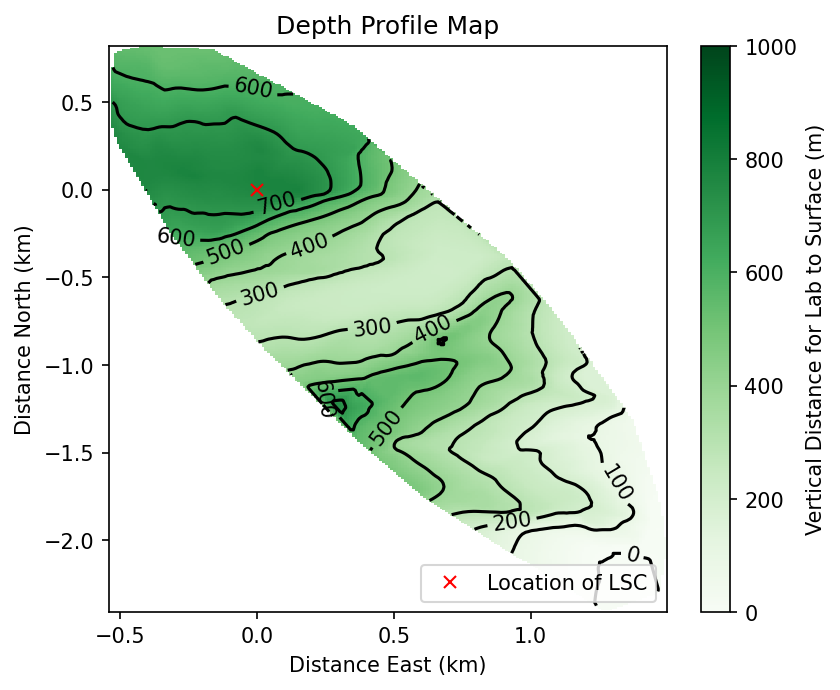

In [6]:
cmap = plt.get_cmap('Greens')
# Plot the height map
plt.figure(figsize=(6,5),dpi=150)
plt.pcolormesh(xx*m_to_km,yy*m_to_km,heights,cmap=cmap)

plt.colorbar(label='Vertical Distance for Lab to Surface (m)')
plt.clim(0,1000)


CS=plt.contour(xx*m_to_km,yy*m_to_km,heights,colors='black',levels=np.arange(0,1000,100))
plt.clabel(CS, inline=1, fontsize=10,fmt='%1.0f')
#plt.ylim(Ymin,Ymax)
#plt.xlim(Xmin,Xmax)
plt.xlabel("Distance East (km)")
plt.ylabel("Distance North (km)")
plt.title("Depth Profile Map")
plt.plot([0],[0],'x',label='Location of LSC',color='red')
plt.legend(loc='lower right')

In [7]:
Xs=list(pdmtn.X)
Ys=list(pdmtn.Y)
Zs=list(pdmtn.Z)

#add values to the corner points to remove white space around mountain
Xs.append(min(Xs));Ys.append(min(Ys));Zs.append(200)
Xs.append(max(Xs));Ys.append(max(Ys));Zs.append(200)


#Make the new interp function
interpolatedMountain=LinearNDInterpolator(np.array([Xs,Ys]).transpose(),Zs)



In [8]:
#to save Extrapolated Mountain to use in MCeQ and Proposal
'''f=open("./ExtendedMountain.pkl",'wb')
pickle.dump(interpolatedMountain,f)
f.close()'''

'f=open("./ExtendedMountain.pkl",\'wb\')\npickle.dump(interpolatedMountain,f)\nf.close()'

In [9]:
#to open Extrapolated Mountain interpolation function
'''f=open("./ExtendedMountain.pkl",'rb') #this should really be called DepthToDetector.pkl but don't want to mess up my working notebooks
interpolatedMountain=pickle.load(f)
f.close()'''

'f=open("./ExtendedMountain.pkl",\'rb\') #this should really be called DepthToDetector.pkl but don\'t want to mess up my working notebooks\ninterpolatedMountain=pickle.load(f)\nf.close()'

In [10]:
#To plot the extended mountain profile
X1= np.arange(min(Xs),max(Xs), StepSize)
Y1= np.arange(min(Ys),max(Ys), StepSize)

[xx,yy]=np.meshgrid(X1,Y1)
heightsExt=np.zeros_like(xx)*-2000
for ix in range(len(X1)):
    for iy in range(len(Y1)):
        heightsExt[iy,ix]=interpolatedMountain(X1[ix],Y1[iy])

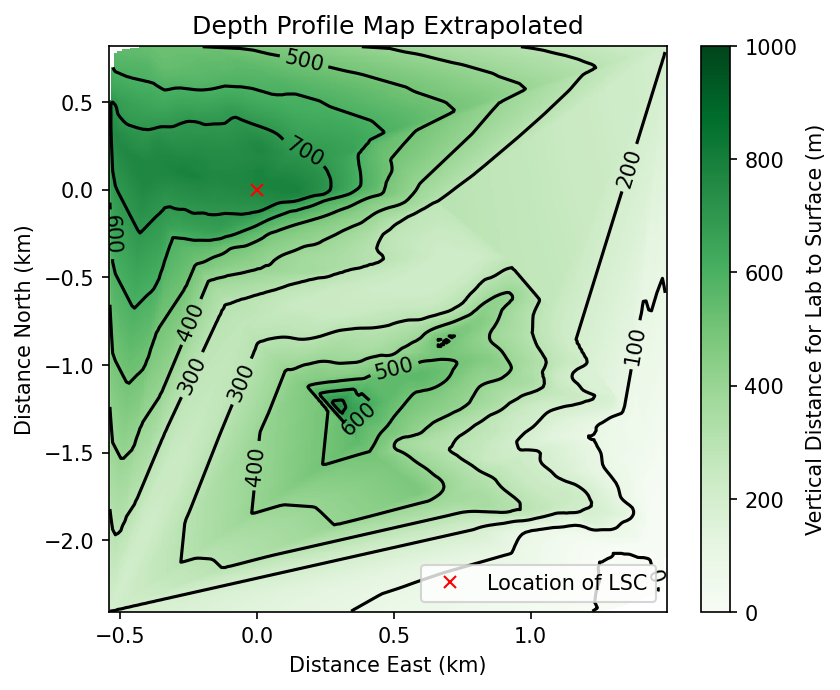

In [11]:
cmap = plt.get_cmap('Greens')
# Plot the height map
plt.figure(figsize=(6,5),dpi=150)
plt.pcolormesh(xx*m_to_km,yy*m_to_km,heightsExt,cmap=cmap)

plt.colorbar(label='Vertical Distance for Lab to Surface (m)')
plt.clim(0,1000)


CS=plt.contour(xx*m_to_km,yy*m_to_km,heightsExt,colors='black',levels=np.arange(0,1000,100))
plt.clabel(CS, inline=1, fontsize=10,fmt='%1.0f')
#plt.ylim(Ymin,Ymax)
#plt.xlim(Xmin,Xmax)
plt.xlabel("Distance East (km)")
plt.ylabel("Distance North (km)")
plt.title("Depth Profile Map Extrapolated")
plt.plot([0],[0],'x',label='Location of LSC',color='red')
plt.legend(loc='lower right')

In [12]:
#To find amount of rock you have to go through to get to the detector
zz=heightsExt.reshape(len(Y1), len(X1))

distancetodetector = np.sqrt((zz+eps)**2+(xx+eps)**2+(yy+eps)**2)

# continuously interpolate rock length functions so we can sample at any X,Y
rocklength=lambda x,y:  (x**2+y**2+interpolatedMountain(x,y)**2)**0.5

In [13]:
#to save  rocklength function to use in  Proposal
'''f=open("./rocklength_to_detector.pkl",'wb')
pickle.dump(rocklength,f)
f.close()'''

'f=open("./rocklength_to_detector.pkl",\'wb\')\npickle.dump(rocklength,f)\nf.close()'

In [14]:
#to open rocklength function
'''f=open("./rocklength_to_detector.pkl",'rb') 
rocklength=pickle.load(f)
f.close()'''

'f=open("./rocklength_to_detector.pkl",\'rb\') \nrocklength=pickle.load(f)\nf.close()'

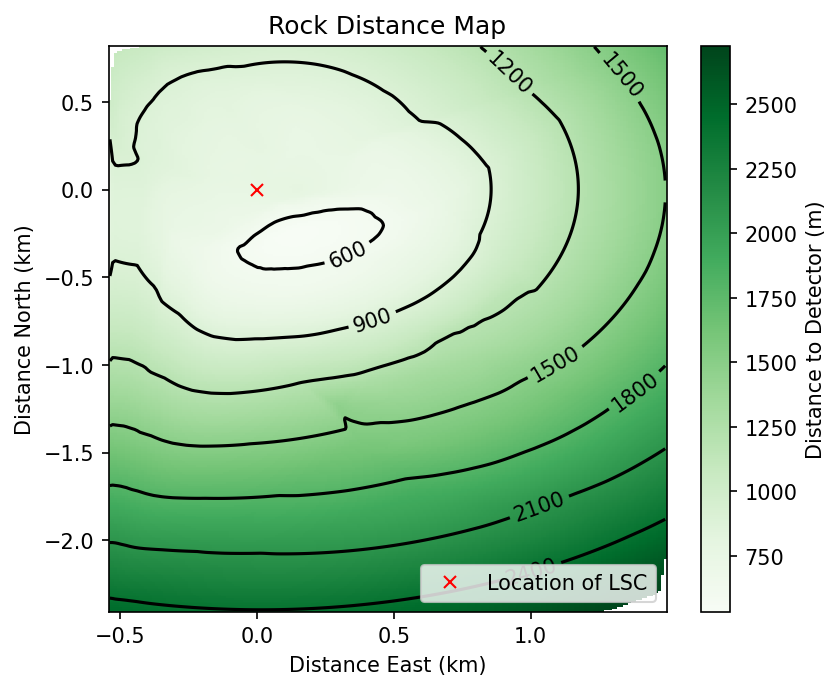

In [15]:
#Plot the distance from the surface to the lab at each place in XY
cmap = plt.get_cmap('Greens')
# Plot the extrapolated amount of rock map
plt.figure(figsize=(6,5),dpi=150)

plt.pcolormesh(xx*m_to_km,yy*m_to_km,rocklength(xx,yy),cmap=cmap)

plt.colorbar(label='Distance to Detector (m)')
#plt.clim(0,1000)


CS=plt.contour(xx*m_to_km,yy*m_to_km,rocklength(xx,yy),colors='black',levels=np.arange(600,2600,300))
plt.clabel(CS, inline=1, fontsize=10,fmt='%1.0f')


plt.xlabel("Distance East (km)")
plt.ylabel("Distance North (km)")
plt.title("Rock Distance Map")
plt.plot([0],[0],'x',label='Location of LSC',color='red')
plt.legend(loc='lower right')